In [1]:
#package for data analysis
import numpy as np
import pandas as pd

#svm
from sklearn import svm

#visualisation
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [2]:
dataset=pd.read_csv('cars.csv')
print(dataset.head())

    mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   year     brand
0  14.0           8          350  165       4209           12   1972       US.
1  31.9           4           89   71       1925           14   1980   Europe.
2  17.0           8          302  140       3449           11   1971       US.
3  15.0           8          400  150       3761           10   1971       US.
4  30.5           4           98   63       2051           17   1978       US.


In [3]:
X=dataset[dataset.columns[:-1]]
X=X.convert_objects(convert_numeric=True)
X.head()

C:\Users\hrajr\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [4]:
#eliminating null values
for i in X.columns:
    print(X[i].isnull().sum())
for i in X.columns:
    X[i] = X[i].fillna(X[i].mean())
for i in X.columns:
    print(X[i].isnull().sum())


0
0
2
0
3
0
0
0
0
0
0
0
0
0


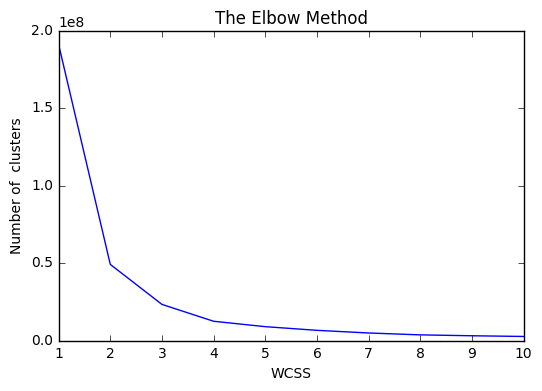

In [5]:
#using elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init ='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)

plt.title('The Elbow Method')
plt.xlabel('WCSS')
plt.ylabel('Number of  clusters')
plt.show()

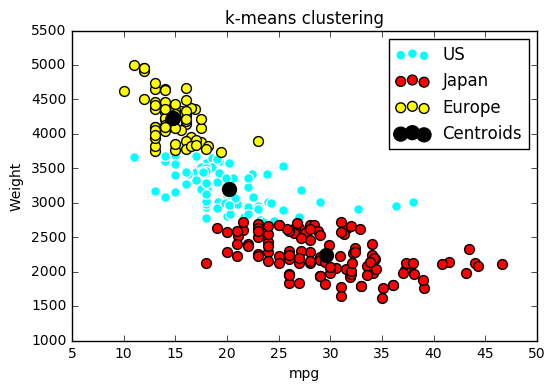

In [6]:
#let take k=3
kmeans=KMeans(n_clusters=3,init ='k-means++',max_iter=300,n_init=10,random_state=0)
#fit and predict for X   

y_kmeans=kmeans.fit_predict(X)
X_np=X.values
#print(X_np[y_kmeans==0][:,0:2])
#considering mpg and weight to plot
plt.scatter(X_np[y_kmeans==0,0],X_np[y_kmeans==0,4],edgecolors='white',s=50,c='cyan',label='US')
plt.scatter(X_np[y_kmeans==1,0],X_np[y_kmeans==1,4],s=50,c='red',label='Japan')
plt.scatter(X_np[y_kmeans==2,0],X_np[y_kmeans==2,4],s=50,c='yellow',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,4],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('mpg')
plt.ylabel('Weight')
plt.title('k-means clustering')
plt.show()